In [1]:
import hangul_font
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import os
import time
import math
import webbrowser
import numpy as np
import re
import sys
import csv

df = pd.read_csv('data_visual.txt2023-1-7-8해시태그 by 스타일.csv',encoding='cp949')
df.drop('Unnamed: 0',axis='columns',inplace =True)
df.rename(columns = {'cordi':'코디','0':'날짜','1':'조회수','2':'댓글'},inplace=True)
df.drop(columns=['댓글'], inplace=True)
df

filter_daendi = (df['코디'] == '댄디')
filter_casual =(df['코디'] == '캐주얼')
filter_street = (df['코디'] == '스트릿')
filter_formal = (df['코디'] == '포멀')
filter_sports = (df['코디'] == '스포츠')
filter_americancasual = (df['코디'] == '아메리칸 캐주얼')


df_americancasual = df[filter_americancasual]
df_americancasual_hashtag = pd.DataFrame(df_americancasual)
df_americancasual_hashtag.drop(columns = ['날짜','조회수'],inplace=True)
df_americancasual_hashtag


n = time.localtime()
s = f'{n.tm_year}-{n.tm_mon}-{n.tm_mday}-{n.tm_sec}'
f_dir = "c:\\temp\\"+s+'.txt'
fc_name = f_dir+'americancasual'+'.csv'

df_americancasual_hashtag.to_csv(fc_name,index ='코디',encoding='cp949')

In [2]:
csv_list = []
with open('2023-1-8-23.txtamericancasual.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    csv_list = list(reader)
    del csv_list[0]


list2 = np.concatenate(csv_list).tolist()
americancasual_hashlist = [item for item in list2 if item != ''  ]

from collections import Counter


#1~100위 스타일 분포
americancasual_cate=np.array(list(set(americancasual_hashlist)))
array_style = np.array(americancasual_hashlist)
americancasualhash_dict=Counter(array_style)
list_key=[]
list_value = []
for key,value in americancasualhash_dict.items():
    list_key.append(key)
    list_value.append(value)

n = time.localtime()
s = f'{n.tm_year}-{n.tm_mon}-{n.tm_mday}-{n.tm_sec}'
f_dir = "c:\\temp\\" +s+".txt"
fc_name = f_dir+s+' americancasualhash.csv'

df_americancasualhash= pd.DataFrame(list_value,index=list_key,columns=['개수'])
ref_americancasual_df=df_americancasualhash['개수'].sort_values(ascending =False)
ref_americancasual_df.to_csv(fc_name,encoding='cp949') 

In [6]:
df=pd.read_csv('2023-1-8-56.txt2023-1-8-56 americancasualhash.csv',encoding='cp949',index_col=0)
americancasual_fit_df=df.loc[['테이퍼드핏','루즈핏','와이드핏','오버핏','벌룬핏']]
americancasual_products_df = df.loc[['트레이닝조거 팬츠','안경 소품','메신저크로스 백','반소매 티셔츠','캔버스단화']]
americancasual_fit_df.sort_values('개수',ascending=False,inplace=True)
americancasual_products_df.sort_values('개수',ascending=True,inplace=True)


Text(0.5, 0, '해시태그 개수')

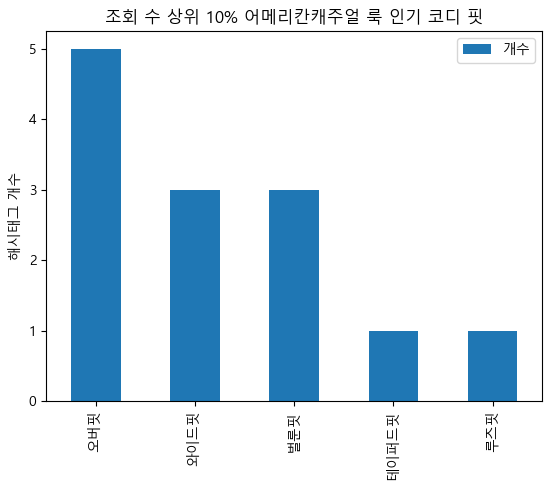

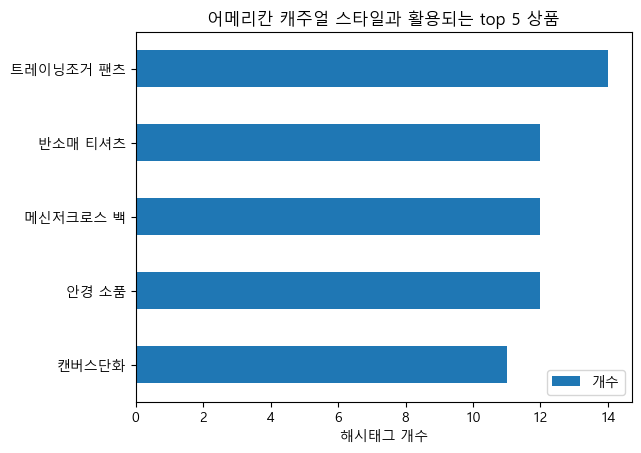

In [7]:
americancasual_fit_df.plot(kind='bar')
plt.title('조회 수 상위 10% 어메리칸캐주얼 룩 인기 코디 핏')
plt.ylabel('해시태그 개수')

americancasual_products_df.plot(kind = 'barh')
plt.title('어메리칸 캐주얼 스타일과 활용되는 top 5 상품')
plt.xlabel('해시태그 개수')